## 1. 기초 설명

- 클래스 : 공통 특성과 기능을 모아 놓은 것 (ex - 달리기, 패스, 헤딩, 위치선정 등)
- 객체 : 클래스를 바탕으로 구현된 실체 (ex - 수비수, 미드필더, 공격수)

In [1]:
class baseball:
    
    # 클래스 속성
    total_player_cnt = 0
    
    # 생성자
    def __init__(self, name, power, speed):
        self.name = name
        self.power = power
        self.speed = speed
        
        print("player의 객체:", self.name)
        
        baseball.total_player_cnt += 1
        print("현재 선수단 인원수:", baseball.total_player_cnt)
        
    def info(self):
        print("이름 :", self.name, "힘 :", self.power, "투구 속도 :", self.speed)
        
    # hi method를 정의할 때, 괄호 안을 비워두면 에러가 발생한다.
    # 객체명.method()의 경우, 객체명이 method의 인자가 되므로 이를 받아줄 매개변수가 필요함.
    # 따라서 self를 넣어줘야 함.
    
    def hi(self, name):
        print("너는", name)
    
    def hit(self, tar):
        print(tar, "적시타!")
        
    def levelup(self):
        self.power += 3
        self.speed *= 1.05

In [2]:
# 생성자를 만들고 인자를 넣지 않으면 에러 발생
bat = baseball("강백호", 90, 145); print(type(bat))
pitch = baseball("김광현", 45, 148)
catch = baseball("박경완", 80, 135)

player의 객체: 강백호
현재 선수단 인원수: 1
<class '__main__.baseball'>
player의 객체: 김광현
현재 선수단 인원수: 2
player의 객체: 박경완
현재 선수단 인원수: 3


In [3]:
catch = baseball("박경완", 80, 135); catch

player의 객체: 박경완
현재 선수단 인원수: 4


'__main__'은 실행파일을 의미. numpy같은 라이브러리도 User가 설치한 Python 파일에 import하여 실행한다고 생각하면 됨. 이 때, 실행파일이 __main__으로 설정되고, 불러온 라이브러리는 __main__이 아닌 파일로 설정된다. (p.597)

In [4]:
print(bat.hi("강백호")) # None은 왜 나오나?

너는 강백호
None


In [5]:
pitch.hi("이강철")

너는 이강철


In [6]:
bat.hit("강백호")

강백호 적시타!


#### 인스턴스 속성

- 속성 : 객체가 공통으로 가지는 특성
- 인스턴스 속성 : 객체별로 다른 값을 가진 속성, 이를 저장하기 위해 생성자(constructor)가 필요
- 생성자 : 객체가 생성될 때 자동으로 실행되는 method.

In [7]:
print(pitch.name, pitch.power, pitch.speed)

김광현 45 148


In [8]:
# 인스턴스 속성을 알려주는 info() method 추가
pitch.info()

이름 : 김광현 힘 : 45 투구 속도 : 148


#### 인스턴스 속성 변경

In [9]:
print("------------------변경 전----------------")
bat.info()

bat.levelup()
print("------------------변경 후----------------")
bat.info()

------------------변경 전----------------
이름 : 강백호 힘 : 90 투구 속도 : 145
------------------변경 후----------------
이름 : 강백호 힘 : 93 투구 속도 : 152.25


#### 클래스 속성

클래스 내부에 만든 변수, 클래스가 직접 값을 가지고 있는 속성

## 2. 프로그램 작성
### 2-1 CVS 정보

In [10]:
class CVS:
    def __init__(self, n, p, s):
        self.name, self.price, self.stock = n, p, s
        
    def info(self):
        print("상품명 :", self.name)
        print("상품가격 :", self.price)
        print("상품재고 :", self.stock)

### 2-2 고객 정보

In [11]:
class consumer:
    def __init__(self, n, v):
        self.name, self.visit = n, v
        self.purchase_list = []
        self.purchase_amount = 0
        
    def info(self):
        print("고객명 :", self.name)
        print("방문일 :", self.visit)
        print("구매상품 :", self.purchase_list)
        print("구매금액 :", self.purchase_amount)
        
    # cvs 클래스에서 인자를 받아옴.    
    def purchase(self, cvs, count):
        print(self.name, ":", cvs.name, "-", count, "개 구입")
        
        # 재고 감소
        cvs.stock -= count
        
        self.purchase_list.append(cvs.name)
        self.purchase_amount += cvs.price * count

### 2-3 정보 등록

In [12]:
# 편의점 정보
cigar = CVS('cigar', 4500, 300)
alcohol = CVS('alcohol', 3500, 150)

# 고객 정보
lee = consumer("lee", 20220728)
kim = consumer("kim", 20220625)

In [13]:
lee.purchase(cigar, 3)

lee : cigar - 3 개 구입


In [14]:
lee.info()

고객명 : lee
방문일 : 20220728
구매상품 : ['cigar']
구매금액 : 13500


In [15]:
lee.purchase(alcohol, 5)
lee.info()

lee : alcohol - 5 개 구입
고객명 : lee
방문일 : 20220728
구매상품 : ['cigar', 'alcohol']
구매금액 : 31000


## 3. 프로젝트 재구성

In [16]:
# load library
import csv
from openpyxl import load_workbook as lw

def load_file():
    # 생활인구 데이터
    f = open("./data/LOCAL_PEOPLE_DONG_202206.csv", 
            encoding = 'utf8')
    data = csv.reader(f)
    next(data) # 컬럼명 제거
    data = list(data)

    # 행정동 코드 데이터
    code = lw("./data/행정동코드_매핑정보_20200325.xlsx", 
                            data_only = True) # 수식 제외 셀값만 가져오기

    # 행정동코드 시트의 데이터 가져오기
    code = code['행정동코드']

    # 행과 열의 데이터 출력 
    all_cell = []

    # code 데이터를 행 단위로 가져온다.
    for r in code.rows:
        r_value = [] # 빈 셀을 만든다

        # 행 단위로 가져온 데이터에서 셀값을 추출해 리스트에 담는다.
        for cell in r:
            r_value.append(cell.value)

        # 위의 과정을 반복하며 모든 데이터를 가져온다.
        all_cell.append(r_value)

    # 컬럼을 제외한다.
    code = all_cell[2:]
    
    # 위경도 데이터
    f2 = open("./data/서울시 행정동별 전력 사용량 2008년 위치정보 (좌표계_ WGS1984).csv", 
            encoding = 'cp949')
    where = csv.reader(f2)
    next(where) # 컬럼명 제거
    where = list(where)
    
    # 행정동 데이터 자료형 변환
    for row in data:
        for i in range(32):
            if i == 0 :
                row[i] = str(row[i])
            elif i <= 2 :
                row[i] = int(row[i])
            else :
                row[i] = float(row[i])

    # 코드 데이터 자료형 변환
    for row in code:
        row[1] = int(row[1])
        
    # 위경도 데이터 자료형 변환
    for row in where:
        row[2], row[-2], row[-1] = int(row[2]), float(row[-2]), float(row[-1])  
        
    return data, code, where

def link_dong(dong):
    
    for row in code:
        if row[-1] == dong:
            dong_code = row[1]

    print(dong, "(" , dong_code , ")" + "을 살펴봅니다!")
    return dong_code

In [17]:
import matplotlib.pyplot as plt
import datetime as dt

class pop_visual: 
    
    # 생성자
    def __init__(self, dong, dong_code):
        self.name = dong
        self.code = dong_code
    
    
    # 꺾은선 그래프 작성
    def linegraph(self, pop_list, label_list, title):
        plt.rc('font', family = "Malgun Gothic")
        plt.title(title, pad = 15)

        for i in range(len(pop_list)):
            plt.plot(range(24), pop_list[i], label = label_list[i])

        plt.xticks(range(24), range(24))
        plt.legend(loc = "best")
        plt.xlabel('시간')
        plt.ylabel('평균 생활인구수')
        plt.show()
        
    
    # 시간대별 분석
    def time_pop(self, dong, dong_code, make_line = 'y'):
    
        pop = [0 for i in range(24)]

        for row in data :
            if row[2] == dong_code:
                pop[row[1]] += row[3]

        pop = [i/31 for i in pop]

        if make_line == 'n':
            return pop

        pop = [pop]
        label = ['평균 생활인구']
        title = dong + " 시간대별 평균 생활인구"
        
        # 객체 설정
        self.linegraph(pop, label, title)
        

    # 주중/주말    
    def week_pop(self):

        weekday = [0 for i in range(24)]
        weekend = [0 for i in range(24)]

        for row in data:
            if row[2] == self.code:
                if dt.date(int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])).weekday() < 5:
                    weekday[row[1]] += row[3]
                else :
                    weekend[row[1]] += row[3]

        # 2021년 1월의 주중/주말 일수 구하기
        day_num, end_num = 0,0

        for i in range(1,32):
            if dt.date(2021,1,i).weekday() < 5:
                day_num +=1
            else:
                end_num +=1

        weekday = [w/day_num for w in weekday]
        weekend = [w/end_num for w in weekend]

        tar_data = [weekday, weekend]
        label = ['주중', '주말']
        title = self.name + " 주중/말 평균 생활인구"
        self.linegraph(tar_data, label, title)
        
    # 성별    
    def sex_pop(self):
    
        man = [0 for i in range(24)]
        woman = [0 for i in range(24)]

        for row in data:
            if row[2] == self.code:
                man[row[1]] += sum(row[4:18])
                woman[row[1]] += sum(row[18:32])

        man = [m/31 for m in man]
        woman = [w/31 for w in woman]

        tar_data = [man, woman]
        label = ['남', '여']
        title = self.name + " 성별 평균 생활인구"
        self.linegraph(tar_data, label, title)
    
    
    # 비교분석
    def diff_pop(self, dong2, dong_code2):
    
        # 두 지역의 평균 생활인구 구하기
        pop_a = self.time_pop(self.name, self.code, 'n')
        pop_b = self.time_pop(dong2, dong_code2, 'n')

        # 꺾은선 그래프 그리기
        tar_data = [pop_a, pop_b]
        label = [self.name, dong2]
        title = self.name + " & " + dong2 + " 시간대별 평균 생활인구"
        self.linegraph(tar_data, label, title)

###  클래스 호출

찾으려는 행정동을 입력하세요! => 삼성1동
삼성1동 ( 11680580 )을 살펴봅니다!
찾으려는 행정동을 입력하세요! => 삼성2동
삼성2동 ( 11680590 )을 살펴봅니다!
비교할 행정동을 입력하세요! => 역삼1동
역삼1동 ( 11680640 )을 살펴봅니다!


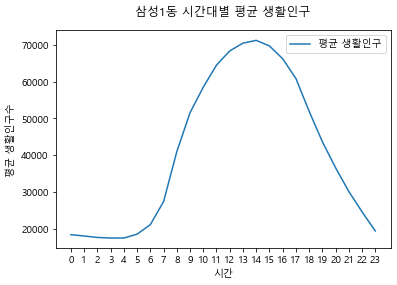

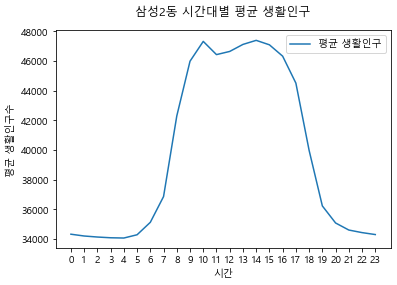

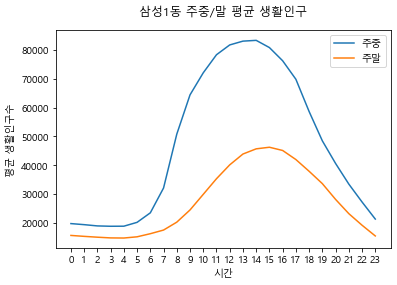

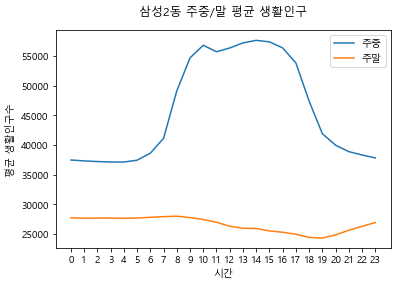

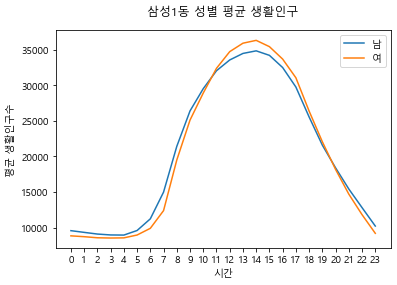

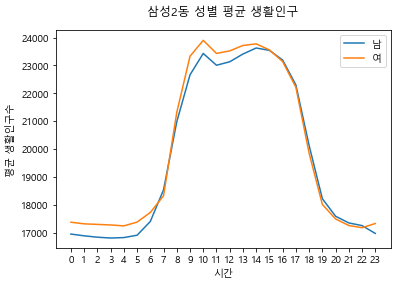

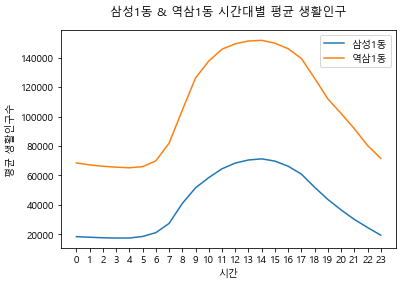

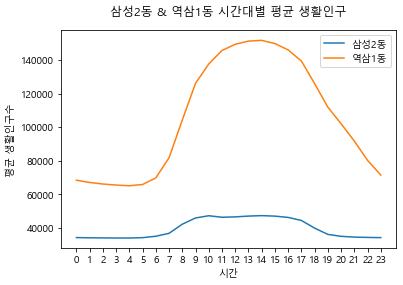

In [20]:
data, code, where = load_file()

tar_dong1 = input("찾으려는 행정동을 입력하세요! => ")
tar_code1 = link_dong(tar_dong1)
tar_dong2 = input("찾으려는 행정동을 입력하세요! => ")
tar_code2 = link_dong(tar_dong2)
tar_dong3 = input("비교할 행정동을 입력하세요! => ")
tar_code3 = link_dong(tar_dong3)

# 객체 생성
sam1 = pop_visual(tar_dong1, tar_code1)
sam2 = pop_visual(tar_dong2, tar_code2)

# 하위분석1
sam1.time_pop(tar_dong1, tar_code1)
sam2.time_pop(tar_dong2, tar_code2)

# 하위분석2
sam1.week_pop()
sam2.week_pop()

# 하위분석3
sam1.sex_pop()
sam2.sex_pop()

# 하위분석4
sam1.diff_pop(tar_dong3, tar_code3)
sam2.diff_pop(tar_dong3, tar_code3)